In [5]:
# Import necessary libraries
import pandas as pd

# Load the dataset
dataset = pd.read_csv('labeled_dataset_with_features.csv')  # Replace with the path to your cleaned dataset

# Check for null values
print(dataset.isnull().sum())

# Dataset overview
print(dataset.info())


Query                    0
Label                    0
query_length             0
num_url_encoded_chars    0
num_digits               0
                        ..
normalized_=             0
count_-                  0
normalized_-             0
count__                  0
normalized__             0
Length: 71, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 71 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Query                  30919 non-null  object 
 1   Label                  30919 non-null  int64  
 2   query_length           30919 non-null  int64  
 3   num_url_encoded_chars  30919 non-null  int64  
 4   num_digits             30919 non-null  int64  
 5   num_uppercase          30919 non-null  int64  
 6   num_lowercase          30919 non-null  int64  
 7   count_!                30919 non-null  int64  
 8   normalized_!           30919 non-null  float

In [6]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = dataset.drop(['Query', 'Label'], axis=1)  # Drop Query and Label for features
y = dataset['Label']  # Target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (24735, 69)
Testing set size: (6184, 69)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9987063389391979

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3893
           1       1.00      1.00      1.00      2291

    accuracy                           1.00      6184
   macro avg       1.00      1.00      1.00      6184
weighted avg       1.00      1.00      1.00      6184



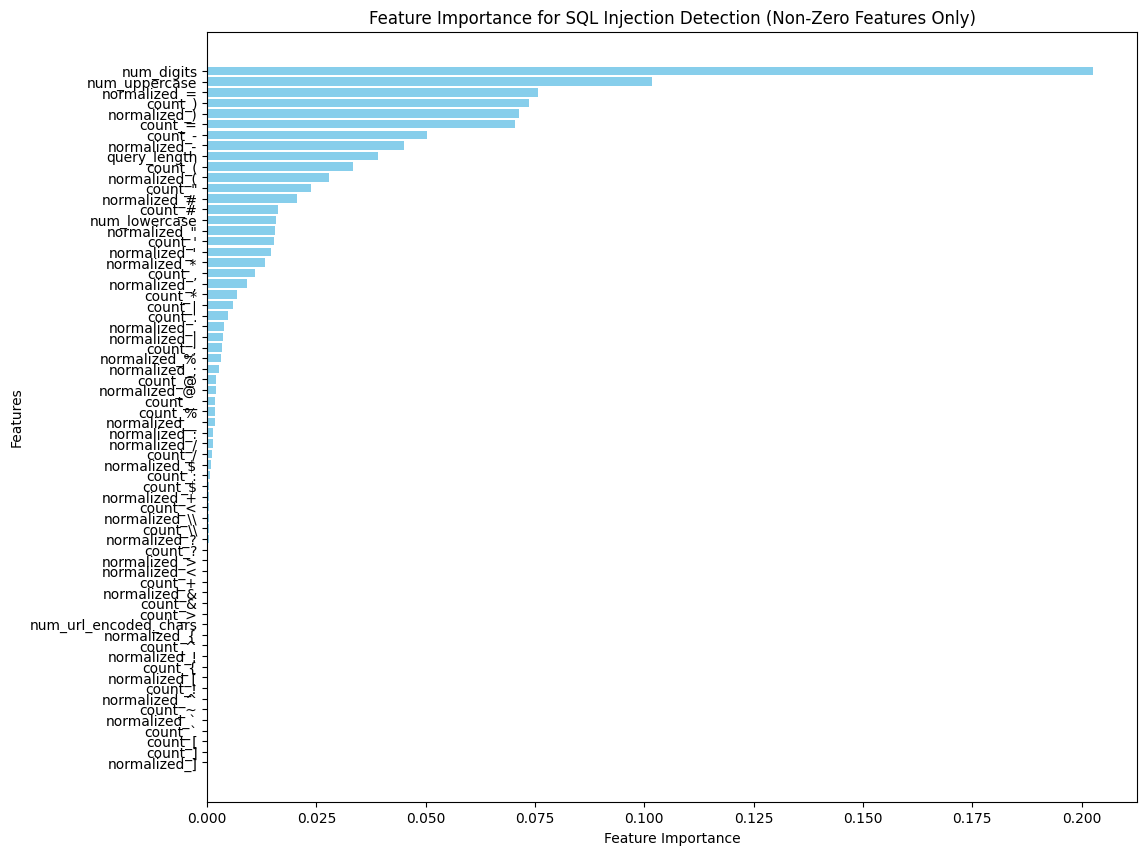

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
})

# Filter out features with zero importance
importance_df = importance_df[importance_df["Importance"] > 0]

importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for SQL Injection Detection (Non-Zero Features Only)")
plt.gca().invert_yaxis()
plt.show()


In [10]:
import joblib

# Save the model to a file
joblib.dump(model, 'sql_injection_model.pkl')

print("Model saved as sql_injection_model.pkl")


Model saved as sql_injection_model.pkl
